<a href="https://colab.research.google.com/github/Arjun9465005/Binary_Classification_kaggle_competition/blob/main/Binary_Classification_of_Insurance_Cross_Selling_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Problem and Objective:
Before diving into the data, we need understand the problem we are trying to solve and the goals of our analysis. This helps in directing our exploration and identifying relevant patterns.For this Health Insurance data,this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# Importing libraries and Loading the Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install catboost scikit-learn


In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/binary classfication/playground-series-s4e7/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/binary classfication/playground-series-s4e7/test.csv")

## Checking the Structure of the Dataset:

In [ ]:
df_train.describe()


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [ ]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
df_train.dtypes


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

 ##
 Checking the Duplicate and Missing Values in the Dataset

In [ ]:
df_train.duplicated().sum()


0

In [ ]:
df_train.shape

(11504798, 12)

In [ ]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Exploratory Data Analysis(EDA)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Create a pairplot
# sns.pairplot(df_train)

# # Display the plot
# plt.show()

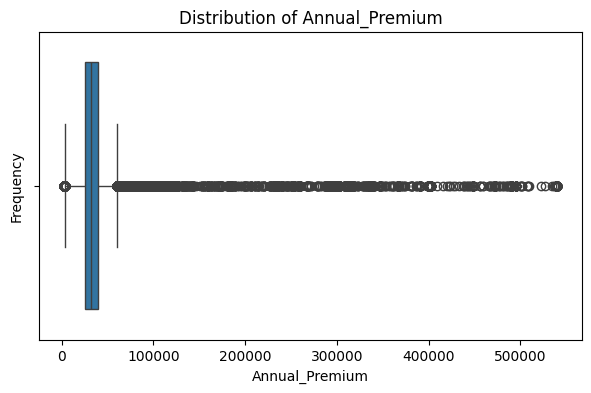

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_train['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

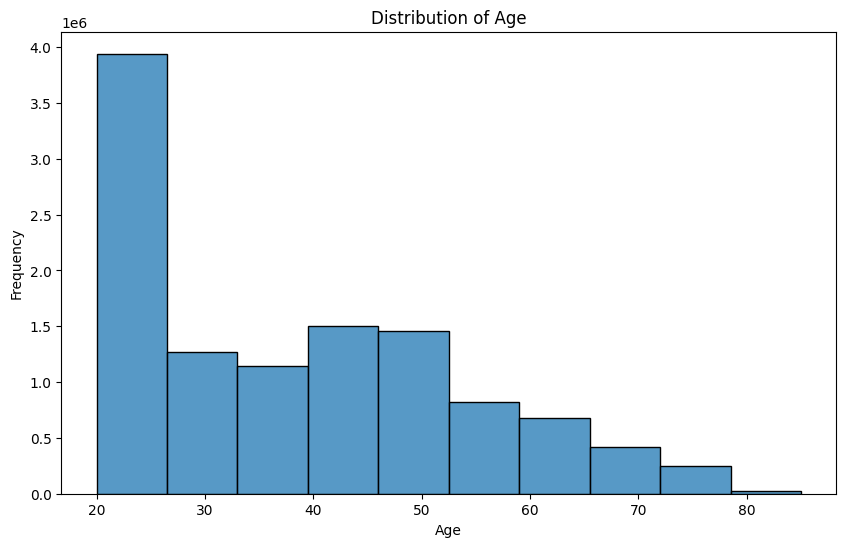

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

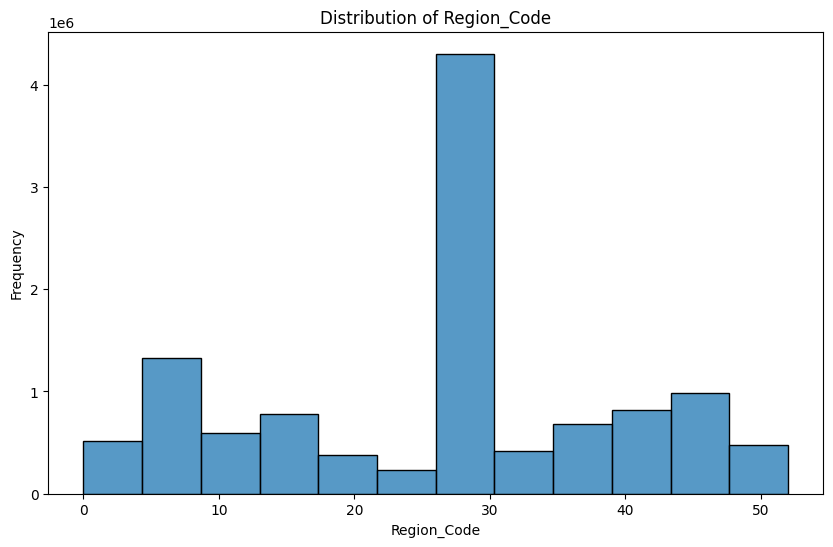

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

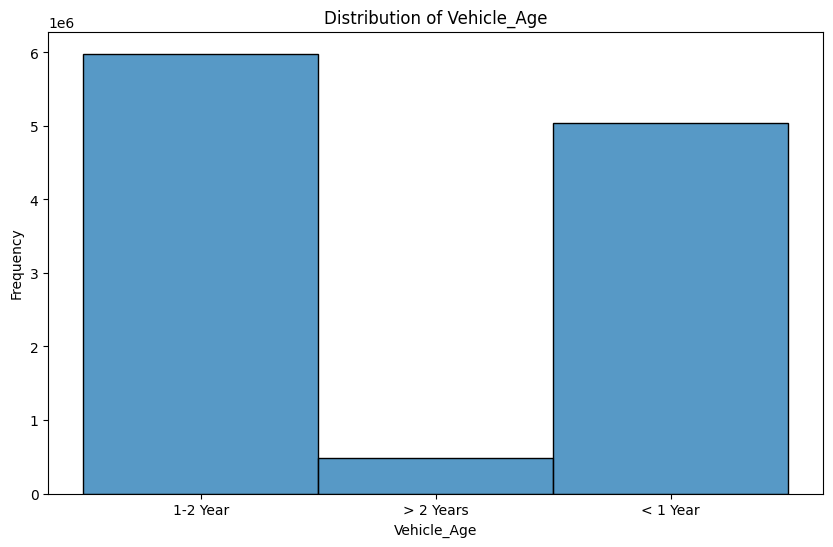

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

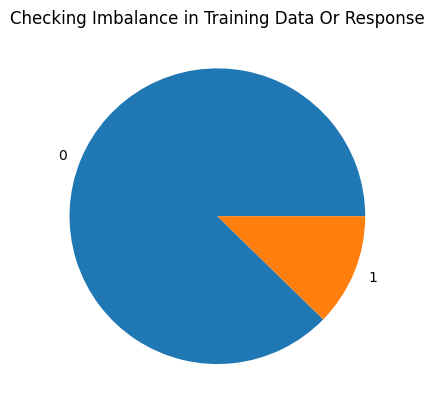

In [ ]:
#Checking If training data is Imbalanced
response_data = df_train['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

In [ ]:
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_train

df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,0,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,1,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,1,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,0,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,1,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,0,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,0,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,1,38866.0,124.0,119


In [ ]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
#For train data
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].astype('category')
df_train = pd.get_dummies(df_train, columns=['Vehicle_Age'])
df_train.head()

#For test data
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Vehicle_Age'])
df_test.head()

#For train Data
df_train['Vehicle_Age_1-2 Year'] = df_train['Vehicle_Age_1-2 Year'].map({True: 1, False: 0})
df_train['Vehicle_Age_< 1 Year'] = df_train['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df_train['Vehicle_Age_> 2 Years'] = df_train['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})

#For test Data
df_test['Vehicle_Age_1-2 Year'] = df_test['Vehicle_Age_1-2 Year'].map({True: 1, False: 0})
df_test['Vehicle_Age_< 1 Year'] = df_test['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df_test['Vehicle_Age_> 2 Years'] = df_test['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})


In [ ]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,21,1,35.0,0,1,65101.0,124.0,187,0,1,0,0
1,1,1,43,1,28.0,0,1,58911.0,26.0,288,1,0,0,1
2,2,0,25,1,14.0,1,0,38043.0,152.0,254,0,0,1,0
3,3,0,35,1,1.0,0,1,2630.0,156.0,76,0,1,0,0
4,4,0,36,1,15.0,1,0,31951.0,152.0,294,0,1,0,0


In [ ]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,0,20,1,47.0,0,0,2630.0,160.0,228,0,1,0
1,11504799,1,47,1,28.0,0,1,37483.0,124.0,123,1,0,0
2,11504800,1,47,1,43.0,0,1,2630.0,26.0,271,1,0,0
3,11504801,0,22,1,47.0,1,0,24502.0,152.0,115,0,1,0
4,11504802,1,51,1,19.0,0,0,34115.0,124.0,148,1,0,0


In [ ]:
df_train.shape

(11504798, 14)

# Catboost with default parameters

Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8804863797037714
Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8803842743898199
Precision Score of CatBoostClassifier model is: 0.5862338169279813
Recall Score of CatBoostClassifier model is: 0.09546090174586135
AUC Score of CatBoostClassifier model is: 0.8787058897163698

------------------------------------------------------------------------
Confusion Matrix of CatBoostClassifier model is:


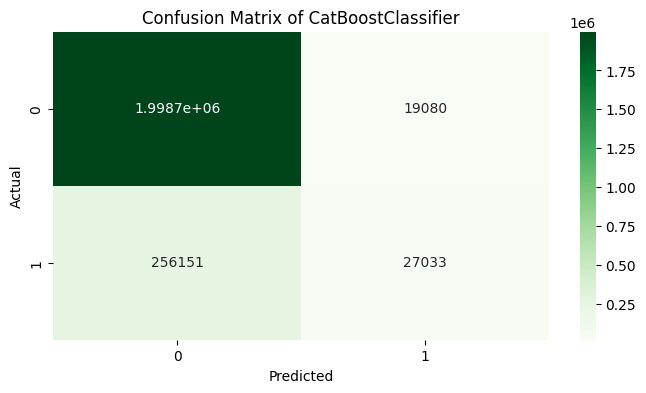

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier


df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

# Features and target
X = df_train.drop('Response', axis=1)
y = df_train['Response']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_prediction(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train, x_train_pred)
    b = accuracy_score(y_test, x_test_pred)
    c = precision_score(y_test, x_test_pred)
    d = recall_score(y_test, x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)

    print(f"Accuracy_Score of {model.__class__.__name__} model on Training Data is:", a)
    print(f"Accuracy_Score of {model.__class__.__name__} model on Testing Data is:", b)
    print(f"Precision Score of {model.__class__.__name__} model is:", c)
    print(f"Recall Score of {model.__class__.__name__} model is:", d)
    print(f"AUC Score of {model.__class__.__name__} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model.__class__.__name__} model is:")

    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Greens")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix of {model.__class__.__name__}')
    plt.show()

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=False)
model_prediction(model)

#############################################################################################
# Results of default parameters
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8804863797037714
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8803842743898199
# Precision Score of CatBoostClassifier model is: 0.5862338169279813
# Recall Score of CatBoostClassifier model is: 0.09546090174586135
# AUC Score of CatBoostClassifier model is: 0.8787058897163698


## Catboost with Hyper parameteric tuning

Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8803738179659398
Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8802943119393645
Precision Score of CatBoostClassifier model is: 0.5907110736368747
Recall Score of CatBoostClassifier model is: 0.0890622351545285
AUC Score of CatBoostClassifier model is: 0.8781228394712273

------------------------------------------------------------------------
Confusion Matrix of CatBoostClassifier model is:


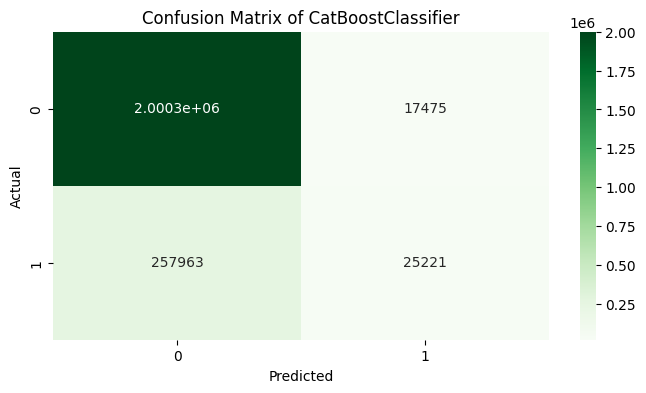

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier


df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

# Features and target
X = df_train.drop('Response', axis=1)
y = df_train['Response']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_prediction(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train, x_train_pred)
    b = accuracy_score(y_test, x_test_pred)
    c = precision_score(y_test, x_test_pred)
    d = recall_score(y_test, x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)

    print(f"Accuracy_Score of {model.__class__.__name__} model on Training Data is:", a)
    print(f"Accuracy_Score of {model.__class__.__name__} model on Testing Data is:", b)
    print(f"Precision Score of {model.__class__.__name__} model is:", c)
    print(f"Recall Score of {model.__class__.__name__} model is:", d)
    print(f"AUC Score of {model.__class__.__name__} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model.__class__.__name__} model is:")

    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Greens")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix of {model.__class__.__name__}')
    plt.show()

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(depth = 6,
    iterations = 1000,
    learning_rate = 0.1,
    l2_leaf_reg = 26.648168065161098,
    min_data_in_leaf = 1,
    # subsample = 0.8580490989206254,
    rsm = 0.5125814118774029, verbose=False)
model_prediction(model)

# Results with different hyperparameters tuning
###################################################################################################################
# model = CatBoostClassifier(depth = 6,
#     iterations = 1000,
#     learning_rate = 0.1,
#     l2_leaf_reg = 26.648168065161098,
#     min_data_in_leaf = 1,
#     # subsample = 0.8580490989206254,
#     rsm = 0.5125814118774029, verbose=False)
# model_prediction(model)

###################################################################################################################################

# # Initialize and train CatBoostClassifier
# model = CatBoostClassifier(depth = 6,
#     iterations = 2100,
#     learning_rate = 0.1,
#     l2_leaf_reg = 26.648168065161098,
#     min_data_in_leaf = 1,
#     # subsample = 0.8580490989206254,
#     rsm = 0.5125814118774029, verbose=False)
# model_prediction(model)

# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8810235469159714
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.880822787010639
# Precision Score of CatBoostClassifier model is: 0.5823592118806058
# Recall Score of CatBoostClassifier model is: 0.11188838352449292
# AUC Score of CatBoostClassifier model is: 0.8799779810140862 /0.8798
###########################################################################################################################################
# model = CatBoostClassifier(depth = 6,
#     iterations = 3000,
#     learning_rate = 0.1,
#     l2_leaf_reg = 26.648168065161098,
#     min_data_in_leaf = 1,
#     # subsample = 0.8580490989206254,
#     rsm = 0.5125814118774029, verbose=False)
# model_prediction(model)
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.881295172731202
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8810005389055003
# Precision Score of CatBoostClassifier model is: 0.5801693900248096
# Recall Score of CatBoostClassifier model is: 0.11973840329962145
# AUC Score of CatBoostClassifier model is: 0.880514043398326
# 1=33908
# 0=1.99324e+06
##################################################################################################################################
# model = CatBoostClassifier(depth = 6,
#     iterations = 4000,
#     learning_rate = 0.1,
#     l2_leaf_reg = 26.648168065161098,
#     min_data_in_leaf = 1,
#     # subsample = 0.8580490989206254,
#     rsm = 0.5125814118774029, verbose=False)
# model_prediction(model)
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.881547458788388
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8811335268757389
# Precision Score of CatBoostClassifier model is: 0.5792326461100104
# Recall Score of CatBoostClassifier model is: 0.12490818690321487
# AUC Score of CatBoostClassifier model is: 0.88078310562092
#####################################################################################################################################



In [ ]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,21,1,35.0,0,1,65101.0,124.0,187,0,1,0,0
1,1,1,43,1,28.0,0,1,58911.0,26.0,288,1,0,0,1
2,2,0,25,1,14.0,1,0,38043.0,152.0,254,0,0,1,0
3,3,0,35,1,1.0,0,1,2630.0,156.0,76,0,1,0,0
4,4,0,36,1,15.0,1,0,31951.0,152.0,294,0,1,0,0


In [ ]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,0,20,1,47.0,0,0,2630.0,160.0,228,0,1,0
1,11504799,1,47,1,28.0,0,1,37483.0,124.0,123,1,0,0
2,11504800,1,47,1,43.0,0,1,2630.0,26.0,271,1,0,0
3,11504801,0,22,1,47.0,1,0,24502.0,152.0,115,0,1,0
4,11504802,1,51,1,19.0,0,0,34115.0,124.0,148,1,0,0


In [ ]:
# Predict probabilities on the actual test data
test_probabilities = model.predict_proba(df_test.drop('id', axis=1))[:, 1]

# Create the submission dataframe
submission_df = pd.DataFrame({
    'id': df_test['id'],
    'Response': test_probabilities
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)